In [1]:
#!/bin/python
# -*- coding: utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

In [2]:
def getData(fn,patten='ccsd/'):
    mapp = {1:'321g',2:'321pg',3:'631g',4:'631gss',5:'6311g',\
            6:'2z',7:'a2z',8:'3z',9:'a3z',10:'4z',11:'a4z',12:'5z',13:'a5z'}
    data = {'321g':[],'321pg':[],'631g':[],'631gss':[],'6311g':[],\
           '2z':[],'a2z':[],'3z':[],'a3z':[],'4z':[],'a4z':[],'5z':[],'a5z':[]}
    with open(fn,'r') as f:
        while True:
            line = f.readline()
            if not line:
                break
            else:
                if patten in line:
                    diff = line.split()
                    for x in range(1,len(mapp.keys())+1):
                        if x<= len(diff) -1:
                            if diff[x] != 'nomatch' and diff[x] !='noexist':
                                temp = float(diff[x])
                                data[mapp[x]].append(temp)
                            else:
                                data[mapp[x]].append('none')
                        else:
                                data[mapp[x]].append('none')
    data = pd.DataFrame(data)
    return data

def trimdata(data):
    out=[]
    for x in data:
        #if isinstance(x,float):
        if not isinstance(x,str):
            out.append(x)
            
    if len(out) == 0:
        return 0
    else:
        return out
    
def median(data):
    data.sort()
    half = len(data) // 2
    return (data[half] + data[~half])/2

In [3]:
# small set
sfb3lyp = 'small/b3lyp/ESP_RRMSD.txt'
sfhf    = 'small/hf/ESP_RRMSD.txt'
sfm06   = 'small/m06/ESP_RRMSD.txt'
sfm062x = 'small/m062x/ESP_RRMSD.txt'
sfmp2   = 'small/mp2/ESP_RRMSD.txt'
sfmn15  = 'small/mn15/ESP_RRMSD.txt'
sfwb97xd= 'small/wb97xd/ESP_RRMSD.txt'
sfccsd  = 'small/ccsd/ESP_RRMSD.txt'

lfb3lyp = 'large/b3lyp/ESP_RRMSD.txt'
lfhf    = 'large/hf/ESP_RRMSD.txt'
lfm06   = 'large/m06/ESP_RRMSD.txt'
lfm062x = 'large/m062x/ESP_RRMSD.txt'
lfmp2   = 'large/mp2/ESP_RRMSD.txt'
lfmn15  = 'large/mn15/ESP_RRMSD.txt'
lfwb97xd= 'large/wb97xd/ESP_RRMSD.txt'

# get small set 
sdata_b3lyp  = getData(sfb3lyp,'ccsd/a5z')
sdata_hf     = getData(sfhf,'ccsd/a5z')
sdata_m06    = getData(sfm06,'ccsd/a5z')
sdata_m062x  = getData(sfm062x,'ccsd/a5z')
sdata_mp2    = getData(sfmp2,'ccsd/a5z')
sdata_mn15   = getData(sfmn15,'ccsd/a5z')
sdata_wb97xd = getData(sfwb97xd,'ccsd/a5z')
sdata_ccsd   = getData(sfccsd,'ccsd/a5z')

# get large set
ldata_b3lyp    = getData(lfb3lyp, 'mp2/a5z')
ldata_hf       = getData(lfhf,    'mp2/a5z')
ldata_m06      = getData(lfm06,   'mp2/a5z')
ldata_m062x    = getData(lfm062x, 'mp2/a5z')
ldata_mp2      = getData(lfmp2,   'mp2/a5z')
ldata_mn15     = getData(lfmn15,  'mp2/a5z')
ldata_wb97xd   = getData(lfwb97xd,'mp2/a5z')

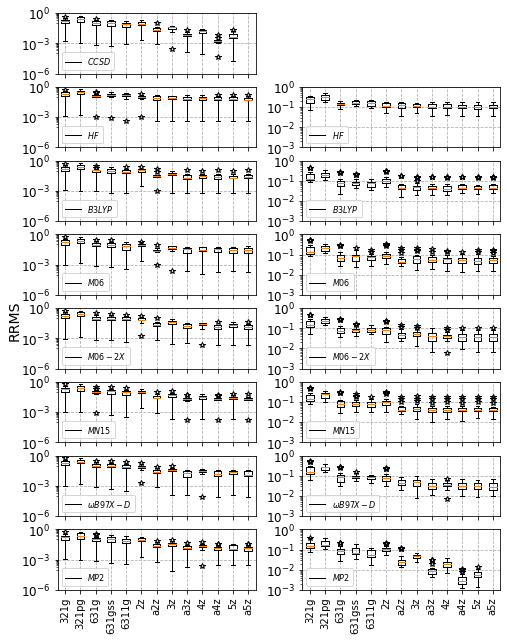

In [10]:
fig = plt.figure(figsize=(7,9))

ax00 =fig.add_subplot(8,2,1)
f00 = ax00.boxplot([trimdata(sdata_ccsd['321g']),trimdata(sdata_ccsd['321pg']),trimdata(sdata_ccsd['631g']),\
                           trimdata(sdata_ccsd['631gss']),trimdata(sdata_ccsd['6311g']),\
                           trimdata(sdata_ccsd['2z']),trimdata(sdata_ccsd['a2z']),\
                           trimdata(sdata_ccsd['3z']),trimdata(sdata_ccsd['a3z']),\
                           trimdata(sdata_ccsd['4z']),trimdata(sdata_ccsd['a4z']),\
                           trimdata(sdata_ccsd['5z']),trimdata(sdata_ccsd['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_ccsd.columns)+1,1))

s_means01 = [np.mean(trimdata(sdata_ccsd[col].values)) for col in sdata_ccsd.columns]
#main_axes01.scatter(np.arange(1,len(sdata_ccsd_1.columns)+1,1), s_means01, color='none',marker='o',edgecolor='black',s=10)
ax00.xaxis.set_tick_params(labelsize=12)
ax00.yaxis.set_tick_params(labelsize=12)
ax00.set_ylim(1e-6,1)
ax00.legend([f00['boxes'][0]],[r'$CCSD$'],ncol=1,loc='lower left',fontsize=8)
ax00.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax00.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax00.yaxis.set_minor_locator(y_minor)
ax00.xaxis.set_major_formatter(plt.NullFormatter())
ax00.yaxis.set_minor_formatter(plt.NullFormatter())
ax00.grid(ls='--')


#---02 subplots ---#
ax10 =fig.add_subplot(8,2,3)
f10=ax10.boxplot([trimdata(sdata_hf['321g']),trimdata(sdata_hf['321pg']),trimdata(sdata_hf['631g']),\
                           trimdata(sdata_hf['631gss']),trimdata(sdata_hf['6311g']),\
                           trimdata(sdata_hf['2z']),trimdata(sdata_hf['a2z']),\
                           trimdata(sdata_hf['3z']),trimdata(sdata_hf['a3z']),\
                           trimdata(sdata_hf['4z']),trimdata(sdata_hf['a4z']),\
                           trimdata(sdata_hf['5z']),trimdata(sdata_hf['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_hf.columns)+1,1))
s_means02 = [np.mean(trimdata(sdata_hf[col].values)) for col in sdata_hf.columns]
#main_axes02.scatter(np.arange(1,len(sdata_hf_1.columns)+1,1), s_means02, color='none',marker='o',edgecolor='black',s=10)
ax10.xaxis.set_tick_params(labelsize=12)
ax10.yaxis.set_tick_params(labelsize=12)
ax10.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax10.legend([f10['boxes'][0]],[r'$HF$'],ncol=1,loc='lower left',fontsize=8)
ax10.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax10.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax10.yaxis.set_minor_locator(y_minor)
ax10.yaxis.set_minor_formatter(plt.NullFormatter())
ax10.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax10.grid(ls='--')

ax20 =fig.add_subplot(8,2,5)
f20=ax20.boxplot([trimdata(sdata_b3lyp['321g']),trimdata(sdata_b3lyp['321pg']),trimdata(sdata_b3lyp['631g']),\
                           trimdata(sdata_b3lyp['631gss']),trimdata(sdata_b3lyp['6311g']),\
                           trimdata(sdata_b3lyp['2z']),trimdata(sdata_b3lyp['a2z']),\
                           trimdata(sdata_b3lyp['3z']),trimdata(sdata_b3lyp['a3z']),\
                           trimdata(sdata_b3lyp['4z']),trimdata(sdata_b3lyp['a4z']),\
                           trimdata(sdata_b3lyp['5z']),trimdata(sdata_b3lyp['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_b3lyp.columns)+1,1))
s_means03 = [np.mean(trimdata(sdata_b3lyp[col].values)) for col in sdata_b3lyp.columns]
#main_axes03.scatter(np.arange(1,len(sdata_b3lyp_1.columns)+1,1), s_means03, color='none',marker='o',edgecolor='black',s=10)
ax20.xaxis.set_tick_params(labelsize=12)
ax20.yaxis.set_tick_params(labelsize=12)
ax20.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax20.legend([f20['boxes'][0]],[r'$B3LYP$'],ncol=1,loc='lower left',fontsize=8)
ax20.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax20.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax20.yaxis.set_minor_locator(y_minor)
ax20.yaxis.set_minor_formatter(plt.NullFormatter())
ax20.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax20.grid(ls='--')

#---04 subplots ---#
ax30 =fig.add_subplot(8,2,7)
f30=ax30.boxplot([trimdata(sdata_m06['321g']),trimdata(sdata_m06['321pg']),trimdata(sdata_m06['631g']),\
                           trimdata(sdata_m06['631gss']),trimdata(sdata_m06['6311g']),\
                           trimdata(sdata_m06['2z']),trimdata(sdata_m06['a2z']),\
                           trimdata(sdata_m06['3z']),trimdata(sdata_m06['a3z']),\
                           trimdata(sdata_m06['4z']),trimdata(sdata_m06['a4z']),\
                           trimdata(sdata_m06['5z']),trimdata(sdata_m06['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_m06.columns)+1,1))
s_means04 = [np.mean(trimdata(sdata_m06[col].values)) for col in sdata_m06.columns]
#main_axes04.scatter(np.arange(1,len(sdata_m06_1.columns)+1,1), s_means04, color='none',marker='o',edgecolor='black',s=10)
ax30.xaxis.set_tick_params(labelsize=12)
ax30.yaxis.set_tick_params(labelsize=12)
ax30.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax30.legend([f30['boxes'][0]],[r'$M06$'],ncol=1,loc='lower left',fontsize=8)
ax30.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax30.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax30.yaxis.set_minor_locator(y_minor)
ax30.yaxis.set_minor_formatter(plt.NullFormatter())
ax30.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax30.grid(ls='--')

#---05 subplots ---#
ax40 =fig.add_subplot(8,2,9)
f40=ax40.boxplot([trimdata(sdata_m062x['321g']),trimdata(sdata_m062x['321pg']),trimdata(sdata_m062x['631g']),\
                           trimdata(sdata_m062x['631gss']),trimdata(sdata_m062x['6311g']),\
                           trimdata(sdata_m062x['2z']),trimdata(sdata_m062x['a2z']),\
                           trimdata(sdata_m062x['3z']),trimdata(sdata_m062x['a3z']),\
                           trimdata(sdata_m062x['4z']),trimdata(sdata_m062x['a4z']),\
                           trimdata(sdata_m062x['5z']),trimdata(sdata_m062x['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_m062x.columns)+1,1))
s_means05 = [np.mean(trimdata(sdata_m062x[col].values)) for col in sdata_m062x.columns]
#main_axes05.scatter(np.arange(1,len(sdata_m062x_1.columns)+1,1), s_means05, color='none',marker='o',edgecolor='black',s=10)
ax40.xaxis.set_tick_params(labelsize=12)
ax40.yaxis.set_tick_params(labelsize=12)
ax40.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax40.legend([f40['boxes'][0]],[r'$M06-2X$'],ncol=1,loc='lower left',fontsize=8)
ax40.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax40.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax40.yaxis.set_minor_locator(y_minor)
ax40.yaxis.set_minor_formatter(plt.NullFormatter())
ax40.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax40.grid(ls='--')

#---06 subplots ---#
ax50 =fig.add_subplot(8,2,11)
f50=ax50.boxplot([trimdata(sdata_mn15['321g']),trimdata(sdata_mn15['321pg']),trimdata(sdata_mn15['631g']),\
                           trimdata(sdata_mn15['631gss']),trimdata(sdata_mn15['6311g']),\
                           trimdata(sdata_mn15['2z']),trimdata(sdata_mn15['a2z']),\
                           trimdata(sdata_mn15['3z']),trimdata(sdata_mn15['a3z']),\
                           trimdata(sdata_mn15['4z']),trimdata(sdata_mn15['a4z']),\
                           trimdata(sdata_mn15['5z']),trimdata(sdata_mn15['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_mn15.columns)+1,1))
s_means06 = [np.mean(trimdata(sdata_mn15[col].values)) for col in sdata_mn15.columns]
#main_axes06.scatter(np.arange(1,len(sdata_mn15_1.columns)+1,1), s_means06, color='none',marker='o',edgecolor='black',s=10)
ax50.xaxis.set_tick_params(labelsize=12)
ax50.yaxis.set_tick_params(labelsize=12)
ax50.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax50.legend([f50['boxes'][0]],[r'$MN15$'],ncol=1,loc='lower left',fontsize=8)
ax50.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax50.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax50.yaxis.set_minor_locator(y_minor)
ax50.yaxis.set_minor_formatter(plt.NullFormatter())
ax50.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax50.grid(ls='--')

#---07 subplots ---#
ax60 =fig.add_subplot(8,2,13)
f60=ax60.boxplot([trimdata(sdata_wb97xd['321g']),trimdata(sdata_wb97xd['321pg']),trimdata(sdata_wb97xd['631g']),\
                           trimdata(sdata_wb97xd['631gss']),trimdata(sdata_wb97xd['6311g']),\
                           trimdata(sdata_wb97xd['2z']),trimdata(sdata_wb97xd['a2z']),\
                           trimdata(sdata_wb97xd['3z']),trimdata(sdata_wb97xd['a3z']),\
                           trimdata(sdata_wb97xd['4z']),trimdata(sdata_wb97xd['a4z']),\
                           trimdata(sdata_wb97xd['5z']),trimdata(sdata_wb97xd['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_wb97xd.columns)+1,1))
s_means07 = [np.mean(trimdata(sdata_wb97xd[col].values)) for col in sdata_wb97xd.columns]
#main_axes07.scatter(np.arange(1,len(sdata_wb97xd_1.columns)+1,1), s_means07, color='none',marker='o',edgecolor='black',s=10)
ax60.xaxis.set_tick_params(labelsize=12)
ax60.yaxis.set_tick_params(labelsize=12)
ax60.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax60.legend([f60['boxes'][0]],[r'$\omega B97X-D$'],ncol=1,loc='lower left',fontsize=8)
ax60.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax60.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax60.yaxis.set_minor_locator(y_minor)
ax60.yaxis.set_minor_formatter(plt.NullFormatter())
ax60.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax60.grid(ls='--')

#---08 subplots ---#
ax70 =fig.add_subplot(8,2,15)
f70=ax70.boxplot([trimdata(sdata_mp2['321g']),trimdata(sdata_mp2['321pg']),trimdata(sdata_mp2['631g']),\
                           trimdata(sdata_mp2['631gss']),trimdata(sdata_mp2['6311g']),\
                           trimdata(sdata_mp2['2z']),trimdata(sdata_mp2['a2z']),\
                           trimdata(sdata_mp2['3z']),trimdata(sdata_mp2['a3z']),\
                           trimdata(sdata_mp2['4z']),trimdata(sdata_mp2['a4z']),\
                           trimdata(sdata_mp2['5z']),trimdata(sdata_mp2['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(sdata_mp2.columns)+1,1))
s_means08 = [np.mean(trimdata(sdata_mp2[col].values)) for col in sdata_mp2.columns]
#main_axes08.scatter(np.arange(1,len(sdata_mp2_1.columns)+1,1), s_means08, color='none',marker='o',edgecolor='black',s=10)
ax70.xaxis.set_tick_params(labelsize=12)
ax70.yaxis.set_tick_params(labelsize=12)
ax70.set_ylim(1e-6,1)
#main_axes02.legend([ax02['boxes'][0]],['ccsd/a4z'],ncol=1,loc='upper right')
ax70.legend([f70['boxes'][0]],[r'$MP2$'],ncol=1,loc='lower left',fontsize=8)
ax70.set_yscale('log',base=10)
y_major = LogLocator(base=1000, numticks=None)
ax70.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=1000, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax70.yaxis.set_minor_locator(y_minor)
ax70.yaxis.set_minor_formatter(plt.NullFormatter())
ax70.xaxis.set_major_formatter(plt.NullFormatter())
#main_axes01.yaxis.set_major_formatter(plt.NullFormatter())
ax70.grid(ls='--')
ax70.set_xticklabels(sdata_ccsd.columns,rotation=90,fontsize=10)

#---11 subplots ---#
ax11=fig.add_subplot(8,2,4)
f11=ax11.boxplot([trimdata(ldata_hf['321g']),trimdata(ldata_hf['321pg']),trimdata(ldata_hf['631g']),\
                           trimdata(ldata_hf['631gss']),trimdata(ldata_hf['6311g']),\
                           trimdata(ldata_hf['2z']),trimdata(ldata_hf['a2z']),\
                           trimdata(ldata_hf['3z']),trimdata(ldata_hf['a3z']),\
                           trimdata(ldata_hf['4z']),trimdata(ldata_hf['a4z']),\
                           trimdata(ldata_hf['5z']),trimdata(ldata_hf['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_hf.columns)+1,1))

l_means22 = [np.mean(trimdata(ldata_hf[col].values)) for col in ldata_hf.columns]
#main_axes22.scatter(np.arange(1,len(ldata_hf.columns)+1,1), l_means22, color='none',marker='o',edgecolor='black',s=10)
ax11.xaxis.set_tick_params(labelsize=12)
ax11.yaxis.set_tick_params(labelsize=12)
ax11.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax11.legend([f11['boxes'][0]],[r'$HF$'],ncol=1,loc='lower left',fontsize=8)
ax11.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax11.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax11.yaxis.set_minor_locator(y_minor)
ax11.xaxis.set_major_formatter(plt.NullFormatter())
ax11.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes22.yaxis.set_major_formatter(plt.NullFormatter())
ax11.grid(ls='--')

#---12 subplots ---#
ax12=fig.add_subplot(8,2,6)
f12=ax12.boxplot([trimdata(ldata_b3lyp['321g']),trimdata(ldata_b3lyp['321pg']),trimdata(ldata_b3lyp['631g']),\
                           trimdata(ldata_b3lyp['631gss']),trimdata(ldata_b3lyp['6311g']),\
                           trimdata(ldata_b3lyp['2z']),trimdata(ldata_b3lyp['a2z']),\
                           trimdata(ldata_b3lyp['3z']),trimdata(ldata_b3lyp['a3z']),\
                           trimdata(ldata_b3lyp['4z']),trimdata(ldata_b3lyp['a4z']),\
                           trimdata(ldata_b3lyp['5z']),trimdata(ldata_b3lyp['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_b3lyp.columns)+1,1))

l_means23 = [np.mean(trimdata(ldata_b3lyp[col].values)) for col in ldata_b3lyp.columns]
#main_axes23.scatter(np.arange(1,len(ldata_b3lyp.columns)+1,1), l_means23, color='none',marker='o',edgecolor='black',s=10)
ax12.xaxis.set_tick_params(labelsize=12)
ax12.yaxis.set_tick_params(labelsize=12)
ax12.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax12.legend([f12['boxes'][0]],[r'$B3LYP$'],ncol=1,loc='lower left',fontsize=8)
ax12.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax12.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax12.yaxis.set_minor_locator(y_minor)
ax12.xaxis.set_major_formatter(plt.NullFormatter())
ax12.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes23.yaxis.set_major_formatter(plt.NullFormatter())
ax12.grid(ls='--')

#---13 subplots ---#
ax13=fig.add_subplot(8,2,8)
f13=ax13.boxplot([trimdata(ldata_m06['321g']),trimdata(ldata_m06['321pg']),trimdata(ldata_m06['631g']),\
                           trimdata(ldata_m06['631gss']),trimdata(ldata_m06['6311g']),\
                           trimdata(ldata_m06['2z']),trimdata(ldata_m06['a2z']),\
                           trimdata(ldata_m06['3z']),trimdata(ldata_m06['a3z']),\
                           trimdata(ldata_m06['4z']),trimdata(ldata_m06['a4z']),\
                           trimdata(ldata_m06['5z']),trimdata(ldata_m06['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_m06.columns)+1,1))

l_means24 = [np.mean(trimdata(ldata_m06[col].values)) for col in ldata_m06.columns]
#main_axes24.scatter(np.arange(1,len(ldata_m06.columns)+1,1), l_means24, color='none',marker='o',edgecolor='black',s=10)
ax13.xaxis.set_tick_params(labelsize=12)
ax13.yaxis.set_tick_params(labelsize=12)
ax13.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax13.legend([f13['boxes'][0]],[r'$M06$'],ncol=1,loc='lower left',fontsize=8)
ax13.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax13.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax13.yaxis.set_minor_locator(y_minor)
ax13.xaxis.set_major_formatter(plt.NullFormatter())
ax13.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes24.yaxis.set_major_formatter(plt.NullFormatter())
ax13.grid(ls='--')

#---14 subplots ---#
ax14=fig.add_subplot(8,2,10)
f14=ax14.boxplot([trimdata(ldata_m062x['321g']),trimdata(ldata_m062x['321pg']),trimdata(ldata_m062x['631g']),\
                           trimdata(ldata_m062x['631gss']),trimdata(ldata_m062x['6311g']),\
                           trimdata(ldata_m062x['2z']),trimdata(ldata_m062x['a2z']),\
                           trimdata(ldata_m062x['3z']),trimdata(ldata_m062x['a3z']),\
                           trimdata(ldata_m062x['4z']),trimdata(ldata_m062x['a4z']),\
                           trimdata(ldata_m062x['5z']),trimdata(ldata_m062x['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_m062x.columns)+1,1))

l_means25 = [np.mean(trimdata(ldata_m062x[col].values)) for col in ldata_m062x.columns]
#main_axes25.scatter(np.arange(1,len(ldata_m062x.columns)+1,1), l_means25, color='none',marker='o',edgecolor='black',s=10)
ax14.xaxis.set_tick_params(labelsize=12)
ax14.yaxis.set_tick_params(labelsize=12)
ax14.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax14.legend([f14['boxes'][0]],[r'$M06-2X$'],ncol=1,loc='lower left',fontsize=8)
ax14.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax14.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax14.yaxis.set_minor_locator(y_minor)
ax14.xaxis.set_major_formatter(plt.NullFormatter())
ax14.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes25.yaxis.set_major_formatter(plt.NullFormatter())
ax14.grid(ls='--')

#---15 subplots ---#
ax15 = fig.add_subplot(8,2,12)
f15=ax15.boxplot([trimdata(ldata_mn15['321g']),trimdata(ldata_mn15['321pg']),trimdata(ldata_mn15['631g']),\
                           trimdata(ldata_mn15['631gss']),trimdata(ldata_mn15['6311g']),\
                           trimdata(ldata_mn15['2z']),trimdata(ldata_mn15['a2z']),\
                           trimdata(ldata_mn15['3z']),trimdata(ldata_mn15['a3z']),\
                           trimdata(ldata_mn15['4z']),trimdata(ldata_mn15['a4z']),\
                           trimdata(ldata_mn15['5z']),trimdata(ldata_mn15['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_mn15.columns)+1,1))

l_means26 = [np.mean(trimdata(ldata_mn15[col].values)) for col in ldata_mn15.columns]
#main_axes26.scatter(np.arange(1,len(ldata_mn15.columns)+1,1), l_means26, color='none',marker='o',edgecolor='black',s=10)
ax15.xaxis.set_tick_params(labelsize=12)
ax15.yaxis.set_tick_params(labelsize=12)
ax15.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax15.legend([f15['boxes'][0]],[r'$MN15$'],ncol=1,loc='lower left',fontsize=8)
ax15.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax15.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax15.yaxis.set_minor_locator(y_minor)
ax15.xaxis.set_major_formatter(plt.NullFormatter())
ax15.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes26.yaxis.set_major_formatter(plt.NullFormatter())
ax15.grid(ls='--')

#---16 subplots ---#
ax16 = fig.add_subplot(8,2,14)
f16=ax16.boxplot([trimdata(ldata_wb97xd['321g']),trimdata(ldata_wb97xd['321pg']),trimdata(ldata_wb97xd['631g']),\
                           trimdata(ldata_wb97xd['631gss']),trimdata(ldata_wb97xd['6311g']),\
                           trimdata(ldata_wb97xd['2z']),trimdata(ldata_wb97xd['a2z']),\
                           trimdata(ldata_wb97xd['3z']),trimdata(ldata_wb97xd['a3z']),\
                           trimdata(ldata_wb97xd['4z']),trimdata(ldata_wb97xd['a4z']),\
                           trimdata(ldata_wb97xd['5z']),trimdata(ldata_wb97xd['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_wb97xd.columns)+1,1))

l_means27 = [np.mean(trimdata(ldata_wb97xd[col].values)) for col in ldata_wb97xd.columns]
#main_axes27.scatter(np.arange(1,len(ldata_wb97xd.columns)+1,1), l_means27, color='none',marker='o',edgecolor='black',s=10)
ax16.xaxis.set_tick_params(labelsize=12)
ax16.yaxis.set_tick_params(labelsize=12)
ax16.set_ylim(1e-3,1)
#main_axes22.legend([ax01['boxes'][0]],['MP2/a4z'],ncol=1,loc='upper right')
ax16.legend([f16['boxes'][0]],[r'$\omega B97X-D$'],ncol=1,loc='lower left',fontsize=8)
ax16.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax16.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax16.yaxis.set_minor_locator(y_minor)
ax16.xaxis.set_major_formatter(plt.NullFormatter())
ax16.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes27.yaxis.set_major_formatter(plt.NullFormatter())
ax16.grid(ls='--')

#---17 subplots ---#
ax17 = fig.add_subplot(8,2,16)
f17=ax17.boxplot([trimdata(ldata_mp2['321g']),trimdata(ldata_mp2['321pg']),trimdata(ldata_mp2['631g']),\
                           trimdata(ldata_mp2['631gss']),trimdata(ldata_mp2['6311g']),\
                           trimdata(ldata_mp2['2z']),trimdata(ldata_mp2['a2z']),\
                           trimdata(ldata_mp2['3z']),trimdata(ldata_mp2['a3z']),\
                           trimdata(ldata_mp2['4z']),trimdata(ldata_mp2['a4z']),\
                           trimdata(ldata_mp2['5z']),trimdata(ldata_mp2['a5z'])],\
                          boxprops={'color':'black'},\
                          flierprops={'marker':'*','markeredgecolor':'black'},\
                          whiskerprops={'linestyle':'-','color':'black'},\
                          widths=0.5,positions=np.arange(1,len(ldata_mp2.columns)+1,1))

l_means21 = [np.mean(trimdata(ldata_mp2[col].values)) for col in ldata_mp2.columns]
#main_axes21.scatter(np.arange(1,len(ldata_mp2.columns)+1,1), l_means21, color='none',marker='o',edgecolor='black',s=10)
ax17.xaxis.set_tick_params(labelsize=12)
ax17.yaxis.set_tick_params(labelsize=12)
ax17.set_ylim(1e-3,1)
ax17.legend([f17['boxes'][0]],[r'$MP2$'],ncol=1,loc='lower left',fontsize=8)
ax17.set_yscale('log',base=10)
y_major = LogLocator(base=10, numticks=None)
ax17.yaxis.set_major_locator(y_major)
y_minor = LogLocator(base=10, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax17.yaxis.set_minor_locator(y_minor)
ax17.xaxis.set_major_formatter(plt.NullFormatter())
ax17.yaxis.set_minor_formatter(plt.NullFormatter())
#main_axes21.yaxis.set_major_formatter(plt.NullFormatter())
ax17.grid(ls='--')

ax17.set_xticklabels(ldata_wb97xd.columns,rotation=90,fontsize=10)

fig.text(0,0.5,r'RRMS', va='center',rotation='vertical',fontsize=14,fontfamily='sans-serif')

plt.tight_layout()
plt.subplots_adjust(hspace=0.22,left=0.1)

plt.savefig('bs_convergence.png',dpi=800,bbox_inches='tight')